<a href="https://colab.research.google.com/github/un21988/CE888-7/blob/main/lab7/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
data = pd.read_csv('/content/Country-data.csv')
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [18]:
import sklearn
from sklearn.preprocessing import MinMaxScaler 

In [20]:
scaler = MinMaxScaler() 
X_trans = scaler.fit_transform(data[[ 'child_mort', 
                                           'exports', 'health', 'imports', 'income', 
                                           'inflation', 'life_expec', 'total_fer',
                                           'gdpp']].values)
X_trans 

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [21]:
from sklearn.cluster import KMeans  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
inner = [] 
for i in range(2, 10):
    model = KMeans(n_clusters=i)
   
    model.fit(X_trans )
 
    inner.append(model.inertia_) 


In [46]:
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=3)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
data['cluster'] = cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


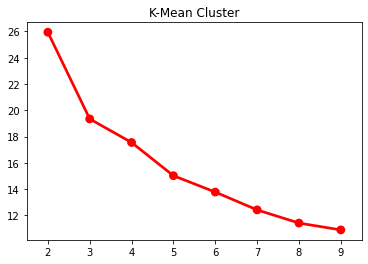

In [43]:

sns.pointplot(x=list(range(2, 10)), y=inner,color= "red" , linestyles=["-", "--"])
plt.title('K-Mean Cluster')
plt.show()

In [48]:
for i in range(4):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(data[data['cluster'] == i]['country'].values)))
    print("Total Members:", len(list(data1[data1['cluster'] == i]['country'].values)))
    print()

Cluster: 0
The Members: Afghanistan | Angola | Benin | Burkina Faso | Burundi | Cameroon | Central African Republic | Chad | Comoros | Congo, Dem. Rep. | Congo, Rep. | Cote d'Ivoire | Equatorial Guinea | Eritrea | Gabon | Gambia | Ghana | Guinea | Guinea-Bissau | Haiti | Iraq | Kenya | Kiribati | Lao | Lesotho | Liberia | Madagascar | Malawi | Mali | Mauritania | Mozambique | Namibia | Niger | Nigeria | Pakistan | Rwanda | Senegal | Sierra Leone | Solomon Islands | Sudan | Tanzania | Timor-Leste | Togo | Uganda | Yemen | Zambia
Total Members: 46

Cluster: 1
The Members: Albania | Algeria | Antigua and Barbuda | Argentina | Armenia | Azerbaijan | Bahamas | Bahrain | Bangladesh | Barbados | Belarus | Belize | Bhutan | Bolivia | Bosnia and Herzegovina | Botswana | Brazil | Bulgaria | Cambodia | Cape Verde | Chile | China | Colombia | Costa Rica | Croatia | Dominican Republic | Ecuador | Egypt | El Salvador | Estonia | Fiji | Georgia | Grenada | Guatemala | Guyana | Hungary | India | Indon